In [1]:
from covid_simulation import * 
import pickle

In [ ]:
N=50_000
type_of_network = 1
data_dir = 'data_' + str(type_of_network)+'_'+ str(N)
G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))


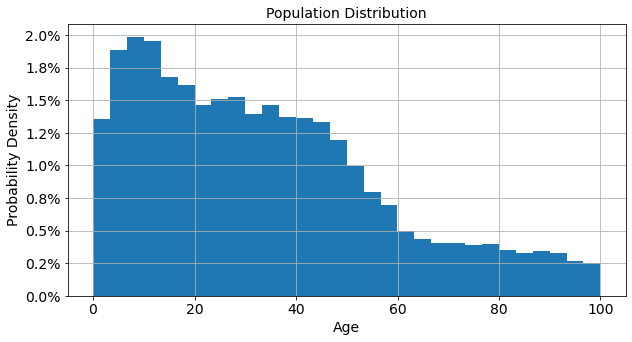

In [4]:
age_list=[y['age'] for x,y in G.nodes(data=True)]
# plot population dist
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(age_list, bins=30, density=True)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.grid()
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14)
plt.title('Population Distribution', fontsize=14)
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1.0, decimals=1))
plt.savefig(os.path.join(data_dir,'Population Distribution.eps'), format='eps')


In [5]:
def plot_dist_per_age(ax, data, age_group,  **kwargs): 

    xlim= kwargs.get('xlim', [0, 40])
    bins= kwargs.get('bins', 50)

    sns.distplot(data, kde=False, fit=stats.norm, axlabel='# Connections', norm_hist=True, 
    ax=ax, bins=bins)
    (mu, sigma) = stats.norm.fit(data)
    ax.set_title('Age Group: {}'.format(age_group))
    ax.set_xlim(xlim)
    #place a text box in upper left in axes coords
    textstr = "$\mu=${0:.2g}\n $\sigma=${1:.2f})".format(mu, sigma)
    ax.text(0.68, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=1.0))
    ax.locator_params(axis='x', nbins=5)
    


In [6]:

G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))
familiy_size_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    if 'group' in y: 
        group=y['group']
        familiy_size_per_age[age_group].append(len(select_per_attr(G,'group',group)))
    else: 
        familiy_size_per_age[age_group].append(1)
        
[np.mean(familiy_size_per_age[x]) for x in range(1,5)]

[4.951638065522621, 4.547759707932293, 4.166142684401451, 2.1855772411511745]

In [ ]:


fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], familiy_size_per_age[1], '1', xlim=[0,10], bins=5)
plot_dist_per_age(axes[0,1], familiy_size_per_age[2], '2', xlim=[0,10], bins=5)
plot_dist_per_age(axes[1,0], familiy_size_per_age[3], '3', xlim=[0,10], bins=5)
plot_dist_per_age(axes[1,1], familiy_size_per_age[4], '4', xlim=[0,10], bins=5)
fig.suptitle('Family size per Age Group\n nomral connections distrubtion', fontsize=16)
plt.savefig(os.path.join(data_dir,'Family size per Age Group - nomral connections distrubtion.eps'), format='eps')
plt.show()


In [ ]:
G=nx.read_gpickle(os.path.join(data_dir,'G_aged.p'))
degree_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    degree_per_age[age_group].append(len(list(nx.neighbors(G, n))))

fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], degree_per_age[1], '1', bins=10)
plot_dist_per_age(axes[0,1], degree_per_age[2], '2', bins=10)
plot_dist_per_age(axes[1,0], degree_per_age[3], '3', bins=10)
plot_dist_per_age(axes[1,1], degree_per_age[4], '4', bins=10)
fig.suptitle('Connections per Age Group\n nomral connections distrubtion', fontsize=16)
plt.savefig(os.path.join(data_dir,'Connections per Age Group - nomral connections distrubtion.eps'), format='eps')
plt.show()

In [ ]:
G=nx.read_gpickle(os.path.join(data_dir,'G_equi_aged.p'))
degree_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    degree_per_age[age_group].append(len(list(nx.neighbors(G, n))))

fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], degree_per_age[1], '1', bins=10)
plot_dist_per_age(axes[0,1], degree_per_age[2], '2', bins=10)
plot_dist_per_age(axes[1,0], degree_per_age[3], '3', bins=10)
plot_dist_per_age(axes[1,1], degree_per_age[4], '4', bins=10)
fig.suptitle('Connections per Age Group\n modified connections', fontsize=16)
plt.savefig(os.path.join(data_dir,'Connections per Age Group - modified connections.eps'), format='eps')
plt.show()

In [ ]:
G=nx.read_gpickle(os.path.join(data_dir,'G_aged_eldery_grouped.p'))
degree_per_age={1:[], 2:[], 3:[], 4:[]}
for n,y in G.nodes(data=True): 
    age_group=find_age_group(y['age'])
    degree_per_age[age_group].append(len(list(nx.neighbors(G, n))))

fig, axes = plt.subplots(2,2, figsize=(10,10))
plot_dist_per_age(axes[0,0], degree_per_age[1], '1', bins=10)
plot_dist_per_age(axes[0,1], degree_per_age[2], '2', bins=10)
plot_dist_per_age(axes[1,0], degree_per_age[3], '3', bins=10)
plot_dist_per_age(axes[1,1], degree_per_age[4], '4', bins=10)
fig.suptitle('Connections per Age Group\n modified eldery connections', fontsize=16)
plt.savefig(os.path.join(data_dir,'Connections per Age Group - modified eldery connections.eps'), format='eps')
plt.show()

In [11]:
basic_p = 0.01
simulation_config=[{'id': 1, 'label':'State1 - normal', 
                    'G_filename': 'G_aged.p', 
                    'p': [basic_p, basic_p, None]}, 

                    {'id': 2, 'label':'State2 - age seperation - update connections', 
                    'G_filename': 'G_equi_aged.p', 
                    'p': [0.0, basic_p, None]}, 

                    {'id': 3, 'label':'State3 - eldery seperation - update connections', 
                    'G_filename': 'G_aged.p', 
                    'p': [basic_p, basic_p, 0.0]}, 

                    {'id': 4, 'label':'State4 - restric social distancing', 
                    'G_filename': 'G_aged.p', 
                    'p': [basic_p/2, basic_p, None]}, 

                    {'id': 5, 'label':'State5 - age seperation - include connection reduction', 
                    'G_filename': 'G_aged.p', 
                    'p': [0.0, basic_p, None]}
]


State1 - normal
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


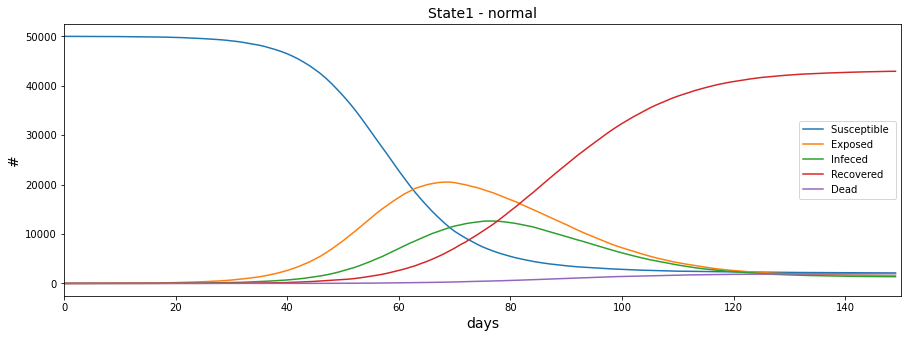

State2 - age seperation - update connections
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


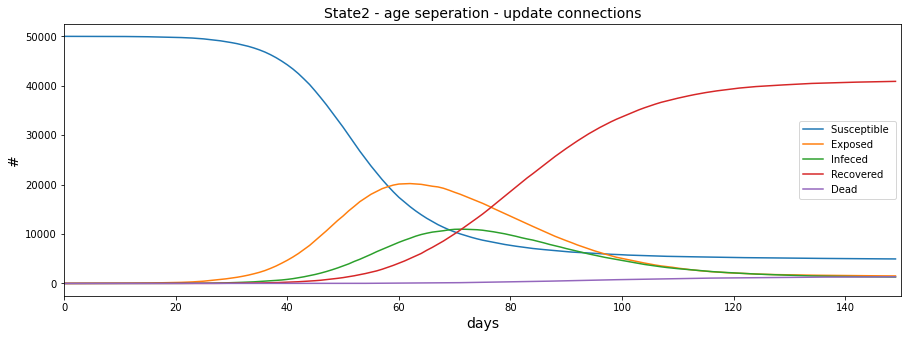

State3 - eldery seperation - update connections
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


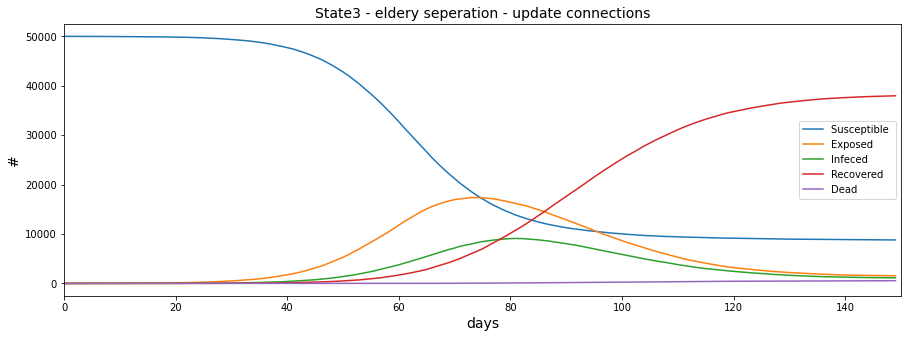

State4 - restric social distancing
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


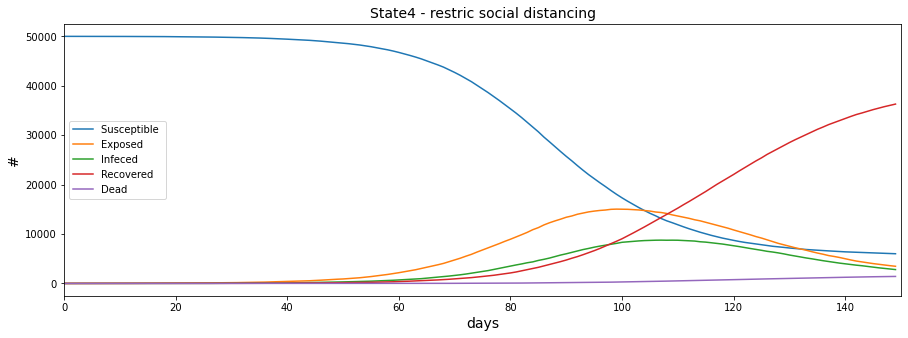

State5 - age seperation - include connection reduction
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


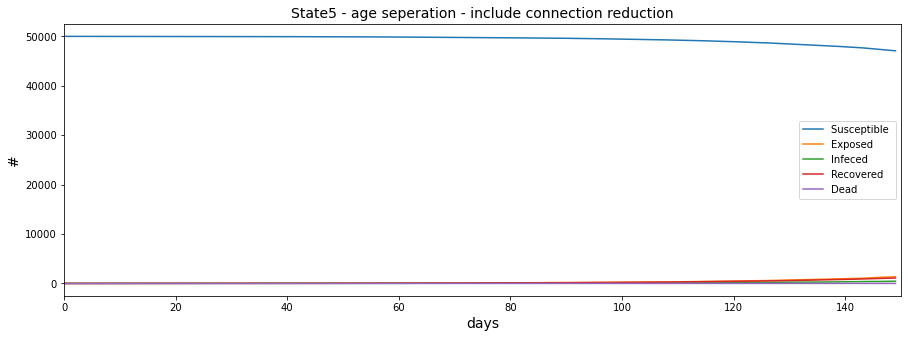

[None, None, None, None, None]

In [12]:
def disp_simulation_results(d): 
    print(d['label'])
    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}.p'.format(d['id']) ), 'rb'))
        
    plt.figure(figsize=(15,5))
    plt.plot(list(map(lambda t : get_status_count(logStatus, t), range(150))))
    plt.xlabel('days', fontsize=14)
    plt.ylabel('#' , fontsize=14)
    plt.xlim([0, 150])
    plt.legend(['Susceptible ','Exposed','Infeced','Recovered', 'Dead'])
    plt.title(d['label'], fontsize=14)
    plt.savefig(os.path.join(data_dir,'full_simulation - {}.eps'.format(d['label'])), format='eps')
    plt.show()

[disp_simulation_results(x) for x in simulation_config]

State1 - normal
State2 - age seperation - update connections
State3 - eldery seperation - update connections
State4 - restric social distancing
State5 - age seperation - include connection reduction
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


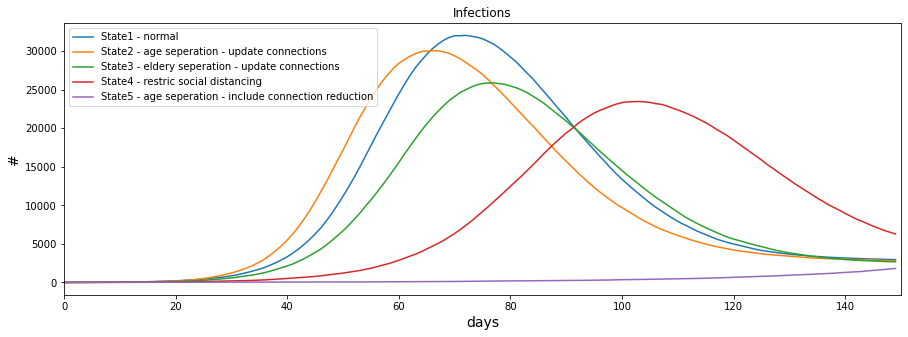

In [13]:
logStatus_summary={}
for k, d in enumerate(simulation_config) : 
    print(d['label'])
    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}.p'.format(d['id']) ), 'rb'))
    logStatus_summary[k] = list(map(lambda t : sum(get_status_count(logStatus, t)[1:3]), range(150)))

plt.figure(figsize=(15,5))
plt.plot(np.vstack([y for x,y in logStatus_summary.items()]).T)
#plt.legend([x['label'].split()[0] for x in  simulation_config])
plt.legend([x['label'] for x in  simulation_config])
plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14)
plt.xlim([0, 150])
plt.title('Infections')
plt.savefig(os.path.join(data_dir,'{}.eps'.format(d['label'])), format='eps')
plt.show()

State1 - normal
State2 - age seperation - update connections
State3 - eldery seperation - update connections
State4 - restric social distancing
State5 - age seperation - include connection reduction
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


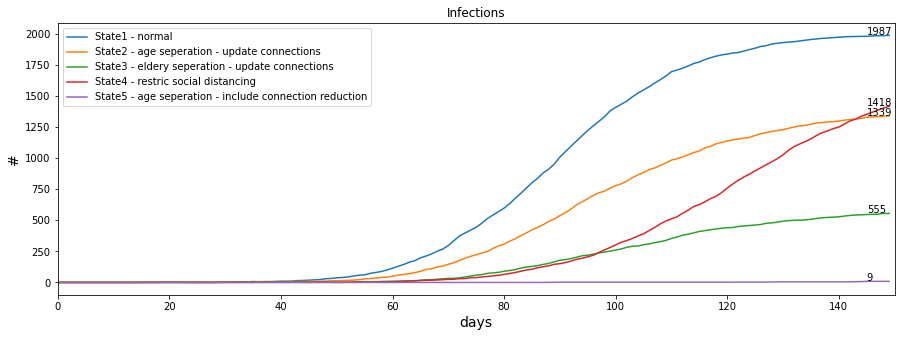

In [14]:
logStatus_summary={}
for k, d in enumerate(simulation_config) : 
    print(d['label'])
    logStatus = pickle.load(open(
        os.path.join(data_dir,'G_logState{0}.p'.format(d['id']) ), 'rb'))
    logStatus_summary[k] = list(map(lambda t : get_status_count(logStatus, t)[4], range(150)))

plt.figure(figsize=(15,5))
plt.plot(np.vstack([y for x,y in logStatus_summary.items()]).T)
plt.legend([x['label'] for x in  simulation_config])
plt.xlabel('days', fontsize=14)
plt.ylabel('#', fontsize=14)
plt.xlim([0, 150])
plt.title('Infections')
[plt.text(145, x[-1]+5, x[-1]) for k,x in logStatus_summary.items()] 
plt.savefig(os.path.join(data_dir,'{}.eps'.format(d['label'])), format='eps')
plt.show()